In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Proceeding

In [2]:
#Load the file
df=pd.read_csv("HRDataset_v14.csv",header =0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Plot 1

### Select relevant data

In [4]:
#Calculate total number of turnover employees for each reasons

df_TR1 = pd.DataFrame(df.groupby('TermReason')["Termd"].count())
df_TR1=df_TR1.drop('N/A-StillEmployed') # Drop the N/A-StillEmployee
df_TR1['turnover']  = (100 * df_TR1['Termd'] /df_TR1 ['Termd'].sum()).round(2) #Calculate the percentage of ech reasons

#Sort by percentage value
df_TR1 = df_TR1.sort_values(by='turnover',ascending=False)
df_TR1.reset_index(inplace=True) #Reset index

In [5]:
# Combine subgroups as 'Others' by count values
df_TR1.loc[df_TR1['turnover']<=7,'TermReason'] = 'Others'


In [6]:
#Create new dataframe by new group
df_TR2 =pd.DataFrame(df_TR1.groupby('TermReason')['turnover'].sum())
df_TR2.reset_index(inplace=True)
df_TR2 = df_TR2.sort_values(by='turnover',ascending=False )

In [7]:
df_TR2

,TermReason,turnover
1,Others,40.39
0,Another position,19.23
5,unhappy,13.46
4,more money,10.58
2,career change,8.65
3,hours,7.69


### Create the plot

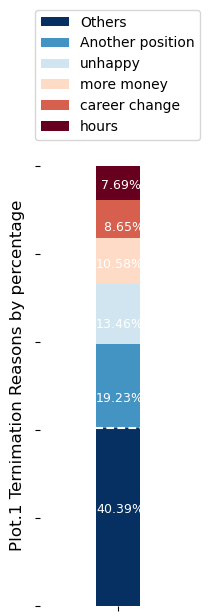

In [8]:
fig,ax = plt.subplots()

df_TR2.set_index('TermReason').T.plot.bar(stacked=True,width=0.2, 
                                                rot=0, 
                                                cmap='RdBu_r',ax=ax,figsize=(2, 6))
#Add benchmark line
ax.hlines(y=40.4,xmin=-0.5,xmax=1,
          colors='white',
         linestyles='dashed')

ax.legend(bbox_to_anchor=(0.5, 1.15), loc='center',fontsize = 'medium')

#Add Title for plot one
ax.set_ylabel('Plot.1 Ternimation Reasons by percentage',size=12)

  #Remove the axis and kepp the lable as title 
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Add lables to show the percentages
ax.annotate('40.39%',xy = (0.67, 0.21),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax.annotate('19.23%',xy = (0.67, 0.45),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax.annotate('13.46%',xy = (0.67, 0.61),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax.annotate('10.58%',xy = (0.67, 0.74),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax.annotate(' 8.65%',xy = (0.67, 0.82),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax.annotate(' 7.69%',xy = (0.65, 0.91),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')

plt.show()

## Plot 2

###  Select relevant data

In [9]:
df_TR = df.groupby(['TermReason','Department','EmploymentStatus'])["Termd"].apply(lambda x : x.astype(int).sum()).reset_index()

In [10]:

department_name = ['Production','Sales','Admin Offices','Software Engineering','IT/IS']
reasons = {
    'Another position': [17, 1, 0, 1, 1],
    'Unhappy':[14,0,0,0,0],
    'More money':[11,0,0,0,0],
    'Career change': [6, 0, 1, 1, 1],
    'Hours': [6,0,0,0,2],
    'Attendance': [5, 1, 0, 1, 0],
    'Relocation out of area':[4,1,0,0,0],
    'Return to school':[5,0,0,0,0],
    'Retiring':[4,0,0,0,0],
    'Performance':[1,0,1,0,2],
    'No-call, no-show':[1,0,1,0,2],
    'Military':[4,0,0,0,0],
    'Medical issues':[1,0,0,1,1],
    'Maternity leave':[2,1,0,0,0],
    'Others':[1,1,0,0,1]
    }

### Create Plot

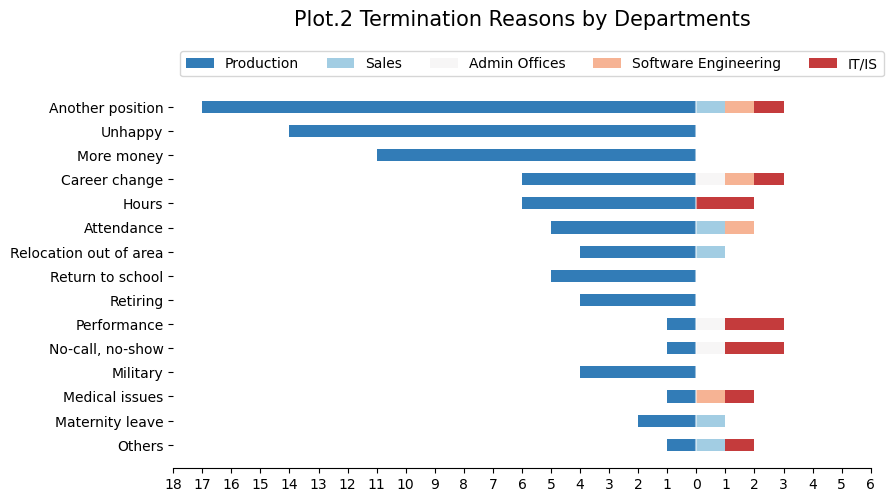

In [11]:
def termreasons(reasons, department_name):
    
    labels = list(reasons.keys())
    data = np.array(list(reasons.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = 1
    offsets = data[:, range(middle_index)].sum(axis=1) 
     
    # Color Mapping
    category_colors = plt.get_cmap('RdBu_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(9, 5))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(department_name, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='-', color='white', alpha=.5)
    
    # X Axis
    ax.set_xlim(-18, 6)
    ax.set_xticks(np.arange(-18, 7, 1))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x)))) # Set left-hand side xticks
    
    # Y Axis
    ax.invert_yaxis()
    
    # Add Title
    figure_title = "Plot.2 Termination Reasons by Departments"
    plt.text(0.5, 1.15, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ledgend
    ax.legend(ncol=len(department_name), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
    
    # Set Background Color
    #fig.set_facecolor('#FFFFFF')

    return fig, ax


fig, ax = termreasons(reasons, department_name)
plt.show()

## Plot 3

### Select Data

In [12]:
#Create new DataFrame
df_dep = df.groupby(['Department', 'Termd'])["Salary", "EngagementSurvey","EmpSatisfaction","SpecialProjectsCount","Absences"].apply(lambda x : x.astype(int).mean().round(2)).reset_index()
df_dep = df_dep.sort_values(by='Salary') #Sort by Salary


/var/folders/k4/zqtb5kxx0x33g50nwzjv1dmh0000gn/T/ipykernel_81701/528202171.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_dep = df.groupby(['Department', 'Termd'])["Salary", "EngagementSurvey","EmpSatisfaction","SpecialProjectsCount","Absences"].apply(lambda x : x.astype(int).mean().round(2)).reset_index()


In [13]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 2
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Department            11 non-null     object 
 1   Termd                 11 non-null     int64  
 2   Salary                11 non-null     float64
 3   EngagementSurvey      11 non-null     float64
 4   EmpSatisfaction       11 non-null     float64
 5   SpecialProjectsCount  11 non-null     float64
 6   Absences              11 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 704.0+ bytes


In [14]:
df_dep['Termd'] = df_dep['Termd'].astype(int)

### Create plot

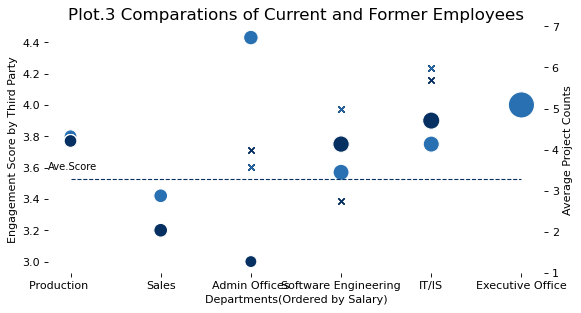

In [15]:
# set the group
groups = df_dep.groupby('Termd')

#set the color
category_colors = plt.get_cmap('RdBu_r')(
    np.linspace(-1, 10))

# Plot 3
fig, ax = plt.subplots(figsize=(8,4), facecolor='white', dpi= 80)
ax1=ax.twinx() #create two plots but use the same x-axis

#Create the scatter plot and linechart(remove the connection line)
for name, group in groups:
    for i, (colname, color) in enumerate(zip(group.Termd, category_colors)):
        ax.scatter(group.Department, group.EngagementSurvey, 
               marker='o',s=(group.Salary)/450, #Set scatter size as salary
               edgecolors='white',color=color)
        ax1.plot(group.Department, group.SpecialProjectsCount, 
               marker='x',linestyle="",color=color)
        
#Add the benchmark line
ax.hlines(y=group.EngagementSurvey.mean(), xmin=0, xmax=5, 
          color= color, alpha=1, linewidth=1, linestyles='dashed')

#Set lables and titles
ax.set_xlabel('Departments(Ordered by Salary)',size=10)
ax.set_ylabel('Engagement Score by Third Party',size=10)
ax1.set_ylabel('Average Project Counts',size=10)
ax.set_title('Plot.3 Comparations of Current and Former Employees',size=15)

#Set the range of ylim for ax1 
ax1.set_ylim(1, 6)
ax1.set_yticks(np.arange(1, 8, 1))


#Add notes
ax.annotate('Ave.Score',xy = (0.1, 0.43),xycoords='axes fraction',ha='right',va="center",fontsize=9,color= 'black')
#Remove spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.bottom.set_visible(False)

plt.show()

# Combine together

In [16]:
import matplotlib.gridspec as gridspec

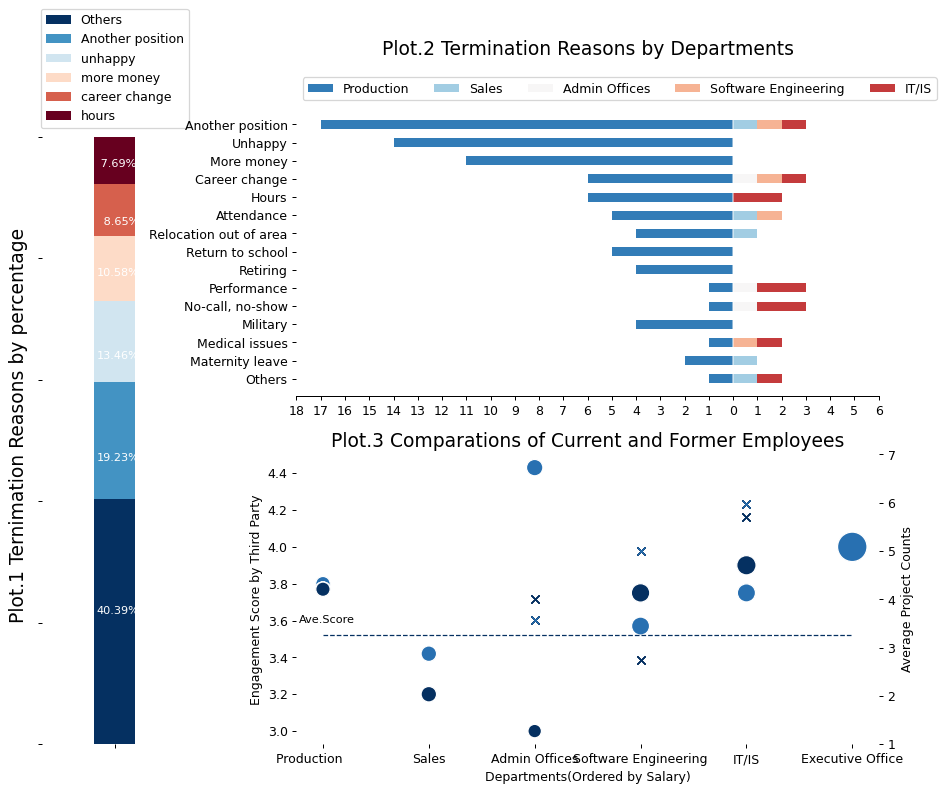

In [17]:
fig = plt.figure(figsize=(12, 9.2),facecolor='white', dpi= 90)  # define the figure and subplots


# parition the figure into 4 subplots with 'gridspec'
gs = gridspec.GridSpec(2, 2, # create 2 rows, 2 cols
                       figure=fig, # this gs applies to figure
                       hspace=0.2, wspace=0.3, # separation between plots
                       width_ratios=[1, 4], # ration between the first and second column
                       height_ratios=[1, 1]
                    ) # ration between

# add plots
ax0 = fig.add_subplot(gs[:, :-1]) # plot 1 will occupy the first colum (0,0) &(1,0)
ax= fig.add_subplot(gs[:-1, -1]) # plot 2 will occupy the (0,1)
ax2 = fig.add_subplot(gs[-1, -1]) # plot 3 will occupy the (1,1)


#Plot1
#Create the Bar Chart in the left
df_TR2.set_index('TermReason').T.plot.bar(stacked=True,width=0.2, 
                                                rot=0, 
                                                cmap='RdBu_r',ax=ax0)

ax0.legend(bbox_to_anchor=(0.5, 1.06), loc='center',fontsize = 'medium')

#Add Title for plot one
ax0.set_ylabel('Plot.1 Ternimation Reasons by percentage',size=15)

  #Remove the axis and kepp the lable as title 
ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)

#Add lables to show the percentages
ax0.annotate('40.39%',xy = (0.67, 0.21),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax0.annotate('19.23%',xy = (0.67, 0.45),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax0.annotate('13.46%',xy = (0.67, 0.61),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax0.annotate('10.58%',xy = (0.67, 0.74),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax0.annotate(' 8.65%',xy = (0.67, 0.82),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')
ax0.annotate(' 7.69%',xy = (0.65, 0.91),xycoords='axes fraction',ha='right',va="center",fontsize=9,color='white')


#Plot 2

#Plot2
def termreasons(reasons, department_name):
    
    labels = list(reasons.keys())
    data = np.array(list(reasons.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = 1
    offsets = data[:, range(middle_index)].sum(axis=1) 
     
    # Color Mapping
    category_colors = plt.get_cmap('RdBu_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    #fig, ax = plt.subplots(figsize=(9, 5))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(department_name, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='-', color='white', alpha=.5)
    
    # X Axis
    ax.set_xlim(-18, 6)
    ax.set_xticks(np.arange(-18, 7, 1))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x)))) # Set left-hand side xticks
    
    # Y Axis
    ax.invert_yaxis()
    
    # Add Title
    figure_title = "Plot.2 Termination Reasons by Departments"
    plt.text(0.5, 1.18, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ledgend
    ax.legend(ncol=len(department_name), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
    
    return fig, ax
fig, ax = termreasons(reasons, department_name)


# set the group
groups = df_dep.groupby('Termd')

#set the color
category_colors = plt.get_cmap('RdBu_r')(
    np.linspace(-1, 10))

# Plot 3

ax3=ax2.twinx() #create two plots but use the same x-axis

#Create the scatter plot and linechart(remove the connection line)
for name, group in groups:
    for i, (colname, color) in enumerate(zip(group.Termd, category_colors)):
        ax2.scatter(group.Department, group.EngagementSurvey, 
               marker='o',s=(group.Salary)/450, #Set scatter size as salary
               edgecolors='white',color=color)
        ax3.plot(group.Department, group.SpecialProjectsCount, 
               marker='x',linestyle="",color=color)
        
#Add the benchmark line
ax2.hlines(y=group.EngagementSurvey.mean(), xmin=0, xmax=5, 
          color= color, alpha=1, linewidth=1, linestyles='dashed')

#Set lables and titles
ax2.set_xlabel('Departments(Ordered by Salary)',size=10)
ax2.set_ylabel('Engagement Score by Third Party',size=10)
ax3.set_ylabel('Average Project Counts',size=10)
ax2.set_title('Plot.3 Comparations of Current and Former Employees',size=15)

#Set the range of ylim for ax3 
ax3.set_ylim(1, 6)
ax3.set_yticks(np.arange(1, 8, 1))


#Add notes
ax2.annotate('Ave.Score',xy = (0.1, 0.43),xycoords='axes fraction',ha='right',va="center",fontsize=9,color= 'black')

#Remove spines
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.left.set_visible(False)
ax3.spines.bottom.set_visible(False)


plt.savefig('SMM635_Q4_Midterm_Project.png',dpi=300)
plt.show()